In [3]:
#imports
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize

#loads the dataset and turns it into an array
data = sns.load_dataset('iris')
iris = data.values

In [4]:
#cleans up the data
x = iris[:,:-1]

#grabs y axis name
y = iris[:,-1]

#normalize the data
x = normalize(x, axis=0, norm='max')

explained variance with  1 components:  0.9213857807811741
explained variance with  2 components:  0.9728070715776642
explained variance with  3 components:  0.9951220727190561
explained variance with  4 components:  0.9999999999999999


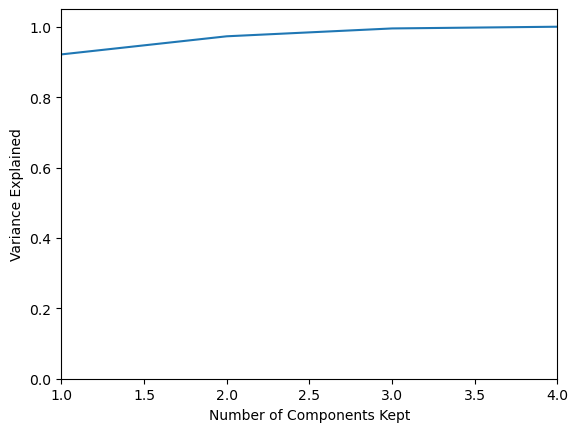

In [6]:
#question 1
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

varArray = []
for i in range(1,x.shape[1]+1):
    pca_test = PCA(n_components = i)
    pca_test.fit(x)
    varArray.append([i,np.sum(pca_test.explained_variance_ratio_)])
    print("explained variance with ",i,"components: ",sum(pca_test.explained_variance_ratio_))
varArray = np.array(varArray)

plt.plot(varArray[:,0],varArray[:,1])
plt.xlabel('Number of Components Kept')
plt.ylabel('Variance Explained')
plt.ylim(0,1.05)
plt.xlim(1,4)
plt.show()

In [7]:
#set up for question 2
#seperate PCA to collect the first 2 output components
pca = PCA(n_components = 2)
pca.fit(x)

#x2d is the first 2 principle components
x2d = pca.transform(x)

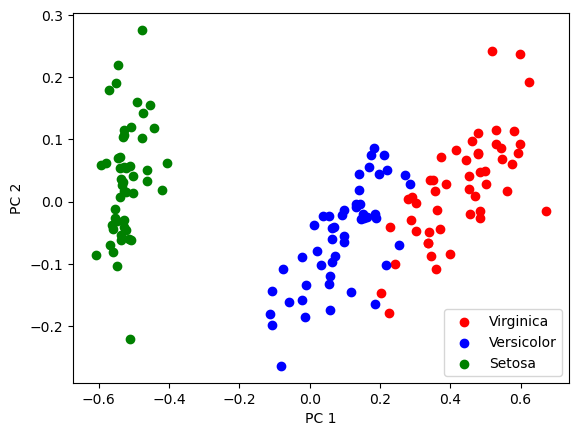

In [9]:
#question 2
plt.scatter(x2d[y == 'virginica', 0], x2d[y == 'virginica', 1], c='r', label='Virginica')
plt.scatter(x2d[y == 'versicolor', 0], x2d[y == 'versicolor', 1], c='b', label='Versicolor')
plt.scatter(x2d[y == 'setosa', 0], x2d[y == 'setosa', 1], c='g', label='Setosa')

labels = ['Virginica', 'Versicolor', 'Setosa']

plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.legend(labels)